# Contours of $i \beta(Z) z$ for complex refractive indices

For simple 3 layer slab.  Recall $\beta(Z) = \sqrt{k_0^2 n_0^2 - Z^2}$.  In this case, $n_0$ is complex with $n_0 = n_r + i n_i$.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from fiberamp.fiber.microstruct.bragg import plotlogf
from IPython.display import HTML
plt.style.use('dark_background')

%matplotlib widget

In [2]:
A = SlabExact(scale=1e-6, Ts=[2., 2., 2.], xrefs=[300, 500, 300],
              ns=np.array([1.44, 1, 1.44]) + 5j, wl=4e-6, symmetric=True)


In [3]:
def gA(Z, z=0):
    K = A.K0 * A.n0
    return 1j * np.sqrt(K**2 - Z**2, dtype=complex)

Look at contour plot of exponent

In [4]:
w = 30

xs, ys = np.linspace(-w, w, 1001), np.linspace(-w/2, w/2, 1001)
Xs, Ys = np.meshgrid(xs, ys)
Zs = Xs + 1j * Ys

gsA = gA(Zs)

In [5]:
N = 15
real_levels = np.linspace(np.min(gsA.real), np.max(gsA.real), N+1)
imag_levels = np.linspace(np.min(gsA.imag), np.max(gsA.imag), N+1)

real_levels = np.concatenate((real_levels, np.array([-A.K0 * A.n0.imag])))
imag_levels = np.concatenate((imag_levels, np.array([A.K0 * A.n0.real])))

real_levels.sort()
imag_levels.sort()

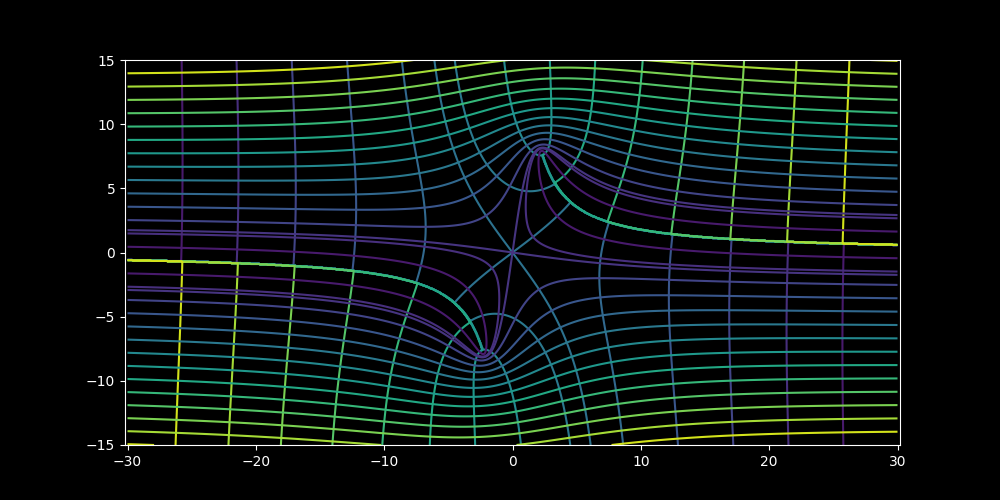

In [6]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,5))
ax.contour(Xs, Ys, gsA.real, levels=real_levels)
ax.contour(Xs, Ys, gsA.imag, levels=imag_levels);
# plt.axvline(0, linewidth=1, color='gray')
# plt.axhline(0, linewidth=1, color='gray')
plt.axis('equal');

In [7]:
plt.plot(xs, A.sdp_Z(xs, 1), ':')
plt.plot(xs, A.sdp_Z(xs, -1), ':')

## Check derivative

In [49]:
x_pos = np.linspace(0, 5, 1000)
dx = x_pos[1] - x_pos[0]
fs = A.sdp_Z(x_pos, 1)
fps = np.gradient(fs, dx)

In [50]:
np.gradient?

Signature: np.gradient(f, *varargs, axis=None, edge_order=1)
Docstring:
Return the gradient of an N-dimensional array.

The gradient is computed using second order accurate central differences
in the interior points and either first or second order accurate one-sides
(forward or backwards) differences at the boundaries.
The returned gradient hence has the same shape as the input array.

Parameters
----------
f : array_like
    An N-dimensional array containing samples of a scalar function.
varargs : list of scalar or array, optional
    Spacing between f values. Default unitary spacing for all dimensions.
    Spacing can be specified using:

    1. single scalar to specify a sample distance for all dimensions.
    2. N scalars to specify a constant sample distance for each dimension.
       i.e. `dx`, `dy`, `dz`, ...
    3. N arrays to specify the coordinates of the values along each
       dimension of F. The length of the array must match the size of
       the corresponding dimensio

In [51]:
(fs[1] - fs[0]) / (x_pos[1] - x_pos[0])

7.085542212982698

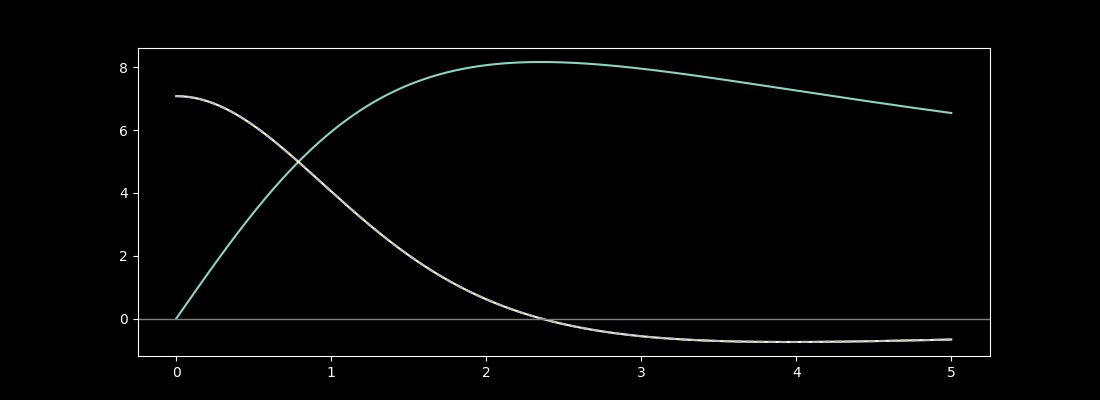

In [54]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(11,4))
ax.plot(x_pos, A.sdp_Z(x_pos, 1))
ax.plot(x_pos, A.sdp_derivative_Z(x_pos, 1), '-')
ax.plot(x_pos, fps, '--')
ax.axhline(0, color='gray', linewidth=1)
# ax.axvline(0, color='gray', linewidth=1)